<a href="https://colab.research.google.com/github/jimmydev88/MachineLearning/blob/main/first_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [50]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

## Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
X= scx.fit_transform(X)

scy = StandardScaler()
y= scy.fit_transform(y)


In [72]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [73]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [74]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [75]:
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])))

array([170370.0204065])

In [76]:
result =scy.inverse_transform(regressor.predict(scx.transform([[6.5]])))
print(result)

[170370.0204065]


## Visualising the SVR results

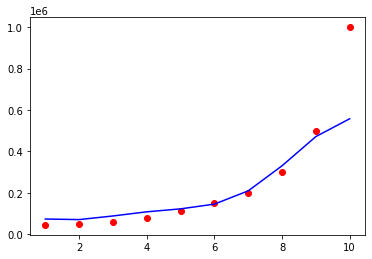

In [78]:
plt.scatter(scx.inverse_transform(X), scy.inverse_transform(y), color='red')
plt.plot(scx.inverse_transform(X),scy.inverse_transform(regressor.predict(X)), color='blue')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

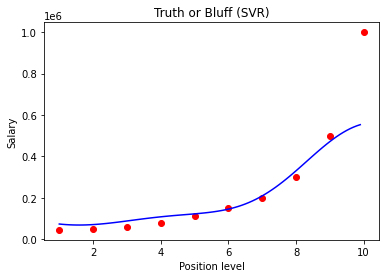

In [79]:
X_grid = np.arange(min(scx.inverse_transform(X)), max(scx.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scx.inverse_transform(X), scy.inverse_transform(y), color = 'red')
plt.plot(X_grid, scy.inverse_transform(regressor.predict(scx.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()